#### Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


#### Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

__Dataset Attributes__
Here is the description of all the variables:

__Variable__: Definition
__ID__: Unique client ID
__age__: Age of the client
__job__: Type of job
__marital__: Marital status of the client
__education__: Education level
__default__: Credit in default.
__housing__: Housing loan
__loan__: Personal loan
__contact__: Type of communication
__month__: Contact month
__day_of_week__: Day of week of contact
__duration__: Contact duration
__campaign__: number of contacts performed during this campaign to the client
__pdays__: number of days that passed by after the client was last contacted
__previous__: number of contacts performed before this campaign
__poutcome__: outcome of the previous marketing campaign

Output variable (desired target):
__Subscribed (target__): has the client subscribed a term deposit? (YES/NO)





In [38]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
# loading the dataset
data_train = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
data_test = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [40]:
# first 5 rows
data_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [41]:
# last 5 rows
data_train.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [42]:
# shape of dataset
train_shape = data_train.shape
print("Shape of train data :",train_shape)
test_shape = data_test.shape
print("Shape of test data :", test_shape)

Shape of train data : (31647, 18)
Shape of test data : (13564, 17)


There are 31647 rows with 18 columns in train data. There are 13564 rows and 17 columns in test data.

In [43]:
# checking for null values
data_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [44]:
data_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are no null values in either train data or test data.

In [45]:
# checking the summary
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [46]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


For both the datasets, all columns have same count, thus proving no null values present in any of the datasets and there are two type of data present(int64, object).

In [47]:
# training data
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,31647.0,22563.972162,13075.936990,2.0,11218.0,22519.0,33879.5,45211.0
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
day,31647.0,15.835466,8.337097,1.0,8.0,16.0,21.0,31.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0
campaign,31647.0,2.765697,3.113830,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,39.576042,99.317592,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.574272,2.422529,0.0,0.0,0.0,0.0,275.0


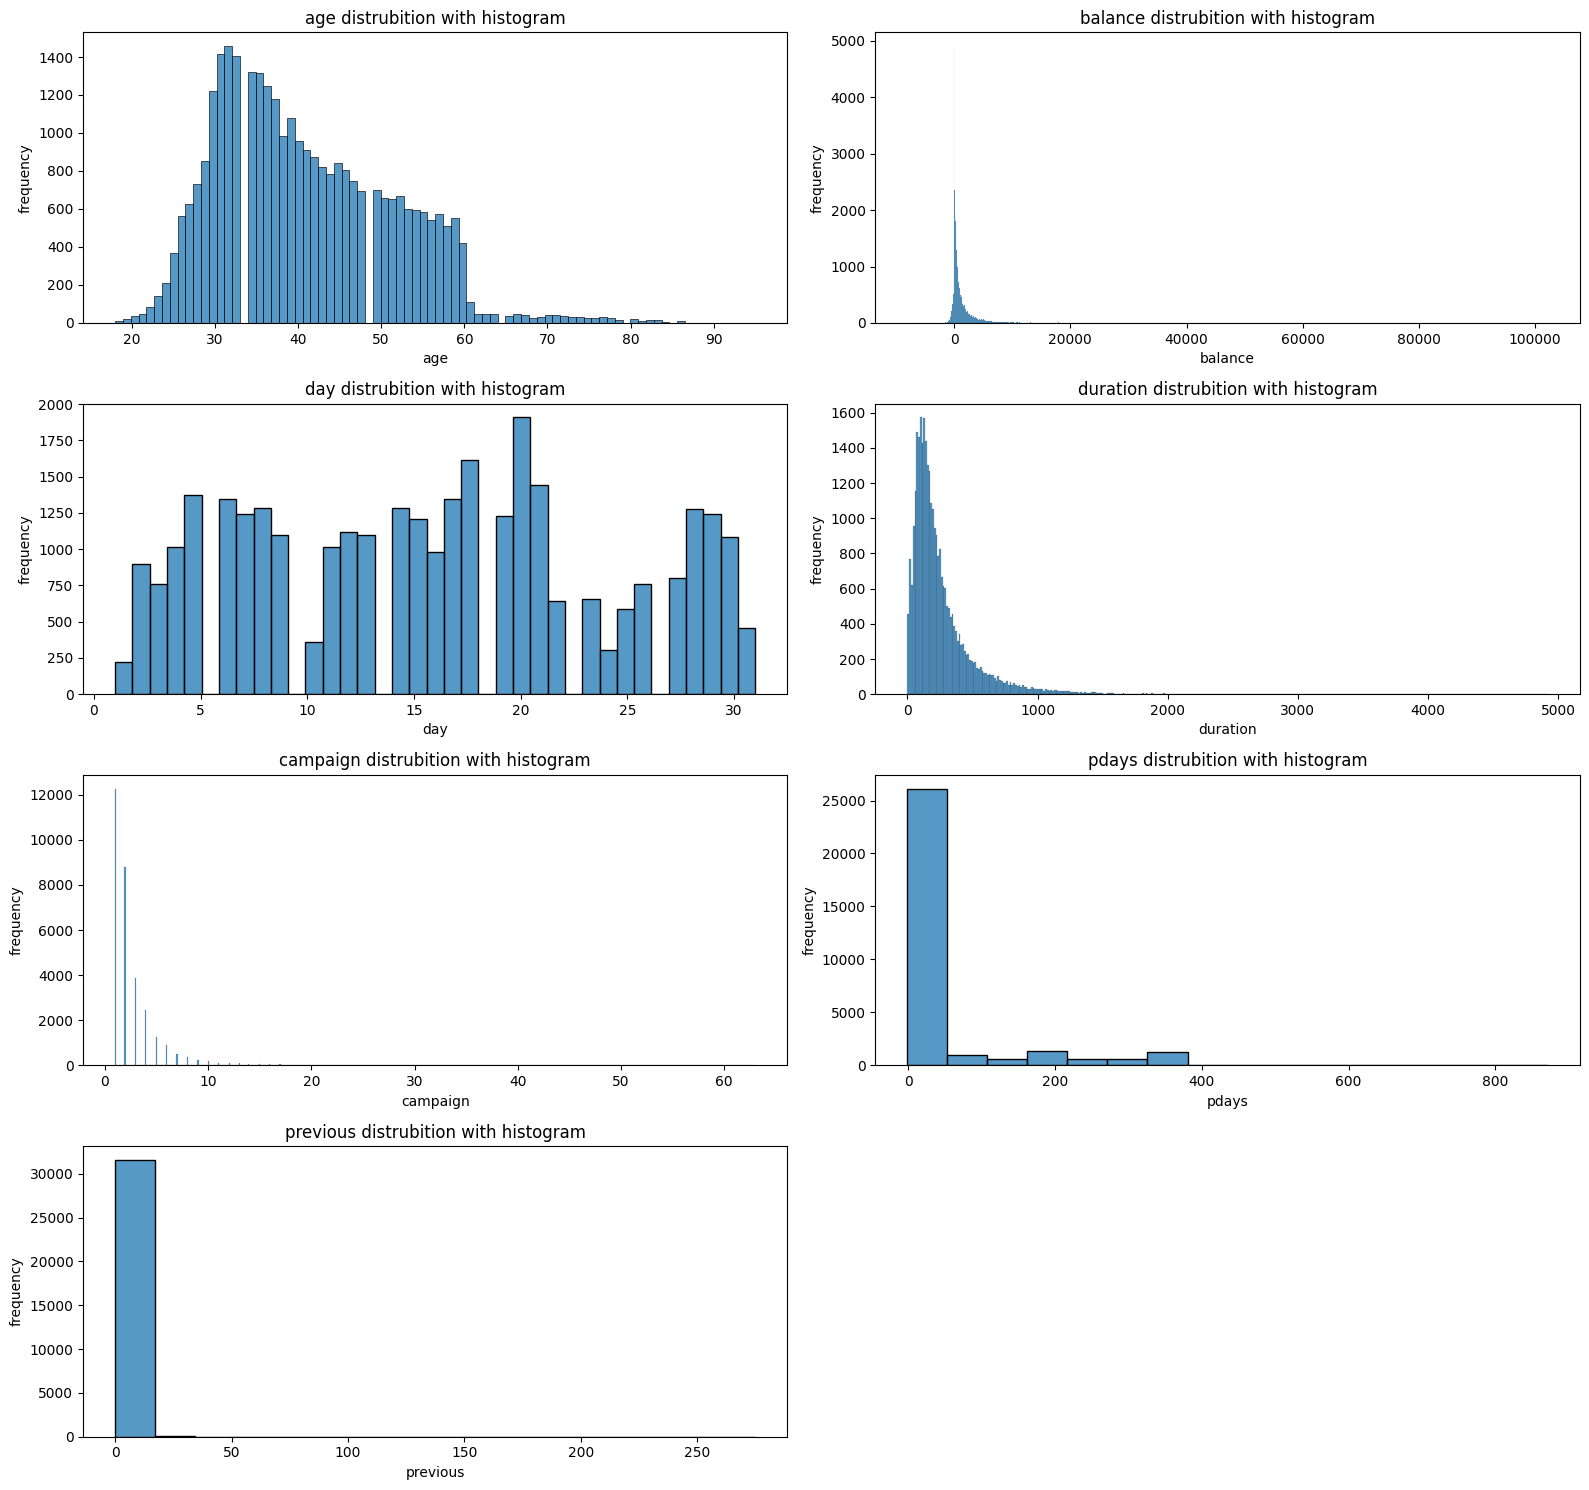

In [48]:
# Data Visualization
# Univariate Analysis on training data

num = data_train.select_dtypes(include='number').columns # selecting the numerical columns from the dataset

# Remove the ID column from the num list
num = num[1:]

# Plotting histograms
plt.figure(figsize=(16,15))
for i, col in enumerate(num):
    plt.subplot(4,2, i+1)
    sns.histplot(data=data_train, x=data_train[col])
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.title("{} distrubition with histogram".format(col))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

We can daw the following conclusions from the training data (numerical columns)--
1. The value in the Age attribute ranges from 18 to 95 with majority of people falling in the range of 33-48(25%-75%).
2. The Balance attribute shows the balance of the client. It has a very wide range(-8019 to 102127). The minimum value is -8019 meaning people have negative balance. Majority of the people have balance ranging from 73 to 1431(25%-75%). This data is highly skewed because there is huge difference between the mean value and the 50 percentile value.
3. The day attribute represents the day of the the month the client was contacted. The range is 1-31. THe data is evenly distributed as indicated by the percentile values.
4. The duration attribute represents the duration of the contact. The minimum value is 0 and the maximum value is 4918 seconds. Majority of the contacts lasted from 104s to 318s.
5. The campaign attributed shows the number of times the client was contacted. The value ranges from 1 to 63 with majority of clients being contacted 1 to 3 times during the campaign.
6. The pdays represents the total number of days passed after the client was last contacted. Majority of clients have values -1 suggesting that they were not contacted. The maximum value is 871 suggesting some were contacted a long time ago.
7. The previous variable represents the number of contacts made to clients before the current marketing campaign. Majority of clients have not been contacted before(value is 0).

In [49]:
for i in data_train.columns:
    if data_train[i].dtype=='object':
        print(i.upper()+"--")
        print(data_train[i].value_counts())
        print()

JOB--
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

MARITAL--
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

EDUCATION--
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

DEFAULT--
no     31062
yes      585
Name: default, dtype: int64

HOUSING--
yes    17584
no     14063
Name: housing, dtype: int64

LOAN--
no     26516
yes     5131
Name: loan, dtype: int64

CONTACT--
cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

MONTH--
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

POUTCOME--
unknown    25929
f

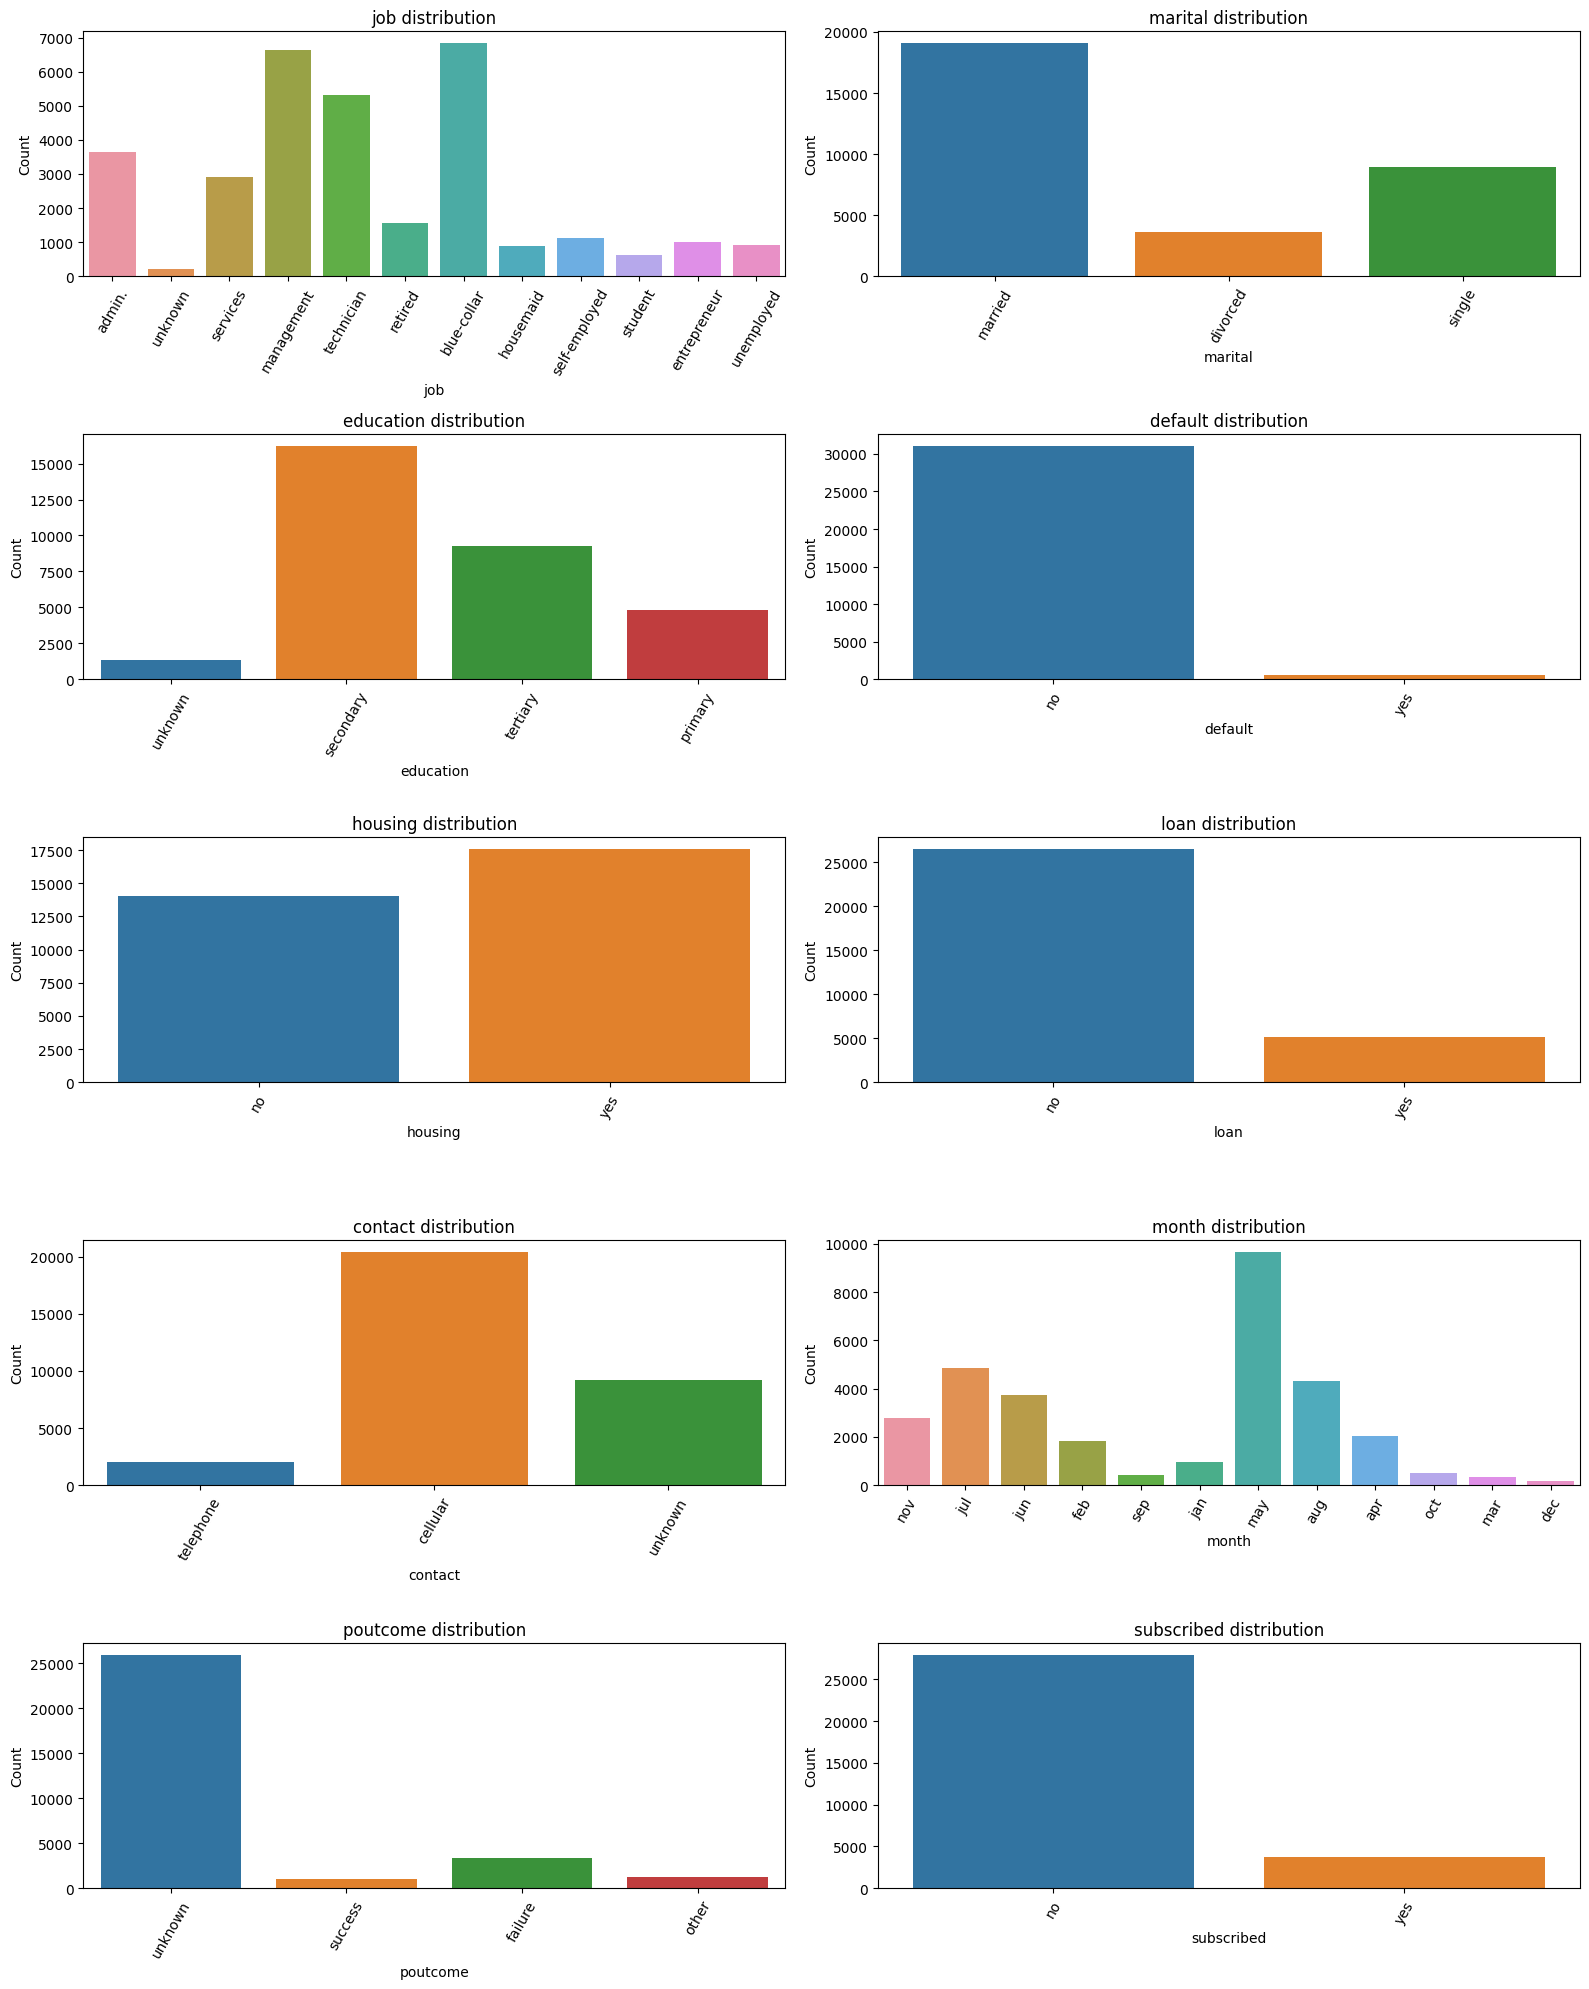

In [50]:
# data visualization
# selecting all the categorical columns
cat = data_train.select_dtypes(include='object').columns

# Plotting barplots
plt.figure(figsize=(16, 20))
for i, col in enumerate(cat):
    plt.subplot(5, 2, i+1)
    sns.countplot(data=data_train, x=data_train[col])
    plt.xticks(rotation=60)
    plt.ylabel("Count")
    plt.title("{} distribution".format(col))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

We can the following insights--
1. Majority of clients have blue-collar, management, and technician jobs. The category "student" have relatively lower count. A small number of clients did not disclose the job details as indicated by 'unknown'.
2. The dataset has a higher number of married clients compared to single and divorced clients. This suggests married individuals are more likely to be customers of the bank.
3. Majority of clients have a secondary education level, followed by tertiary and primary levels. There is also a portion of clients with an unknown education background.
4. Majority of clients have no credit default. The count of clients with a credit default is significantly lower.
5. The number of clients with a housing loan is relatively higher compared to those without a housing loan.
6. Most clients do not have a personal loan, while a smaller proportion has taken a personal loan.
7. The most common type of communication used to contact the clients is cellular, followed by unknown(no contact information) and telephone.
8. May has the highest number of contacts, followed by July and August.
9. Majority of clients have an unknown outcome from a previous marketing campaign. The count of successful outcomes is the lowest.
10. The target variable indicates whether a client subscribed to the term deposit product or not. The count shows that a larger number of clients did not subscribe (no) compared to those who did (yes). This suggests an imbalance in the target variable.

In [51]:
# test data
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,13564.0,22704.057726,12994.043329,1.0,11546.0,22782.0,33974.25,45206.0
age,13564.0,40.887128,10.604108,18.0,33.0,39.0,48.00,95.0
balance,13564.0,1358.496535,3082.940623,-3313.0,71.0,445.0,1413.25,98417.0
day,13564.0,15.738646,8.288174,1.0,8.0,16.0,21.00,31.0
duration,13564.0,258.278679,258.488648,0.0,102.0,180.0,319.00,3253.0
campaign,13564.0,2.759510,3.060928,1.0,1.0,2.0,3.00,58.0
pdays,13564.0,41.648555,101.985178,-1.0,-1.0,-1.0,-1.00,850.0
previous,13564.0,0.594441,1.998193,0.0,0.0,0.0,0.00,55.0


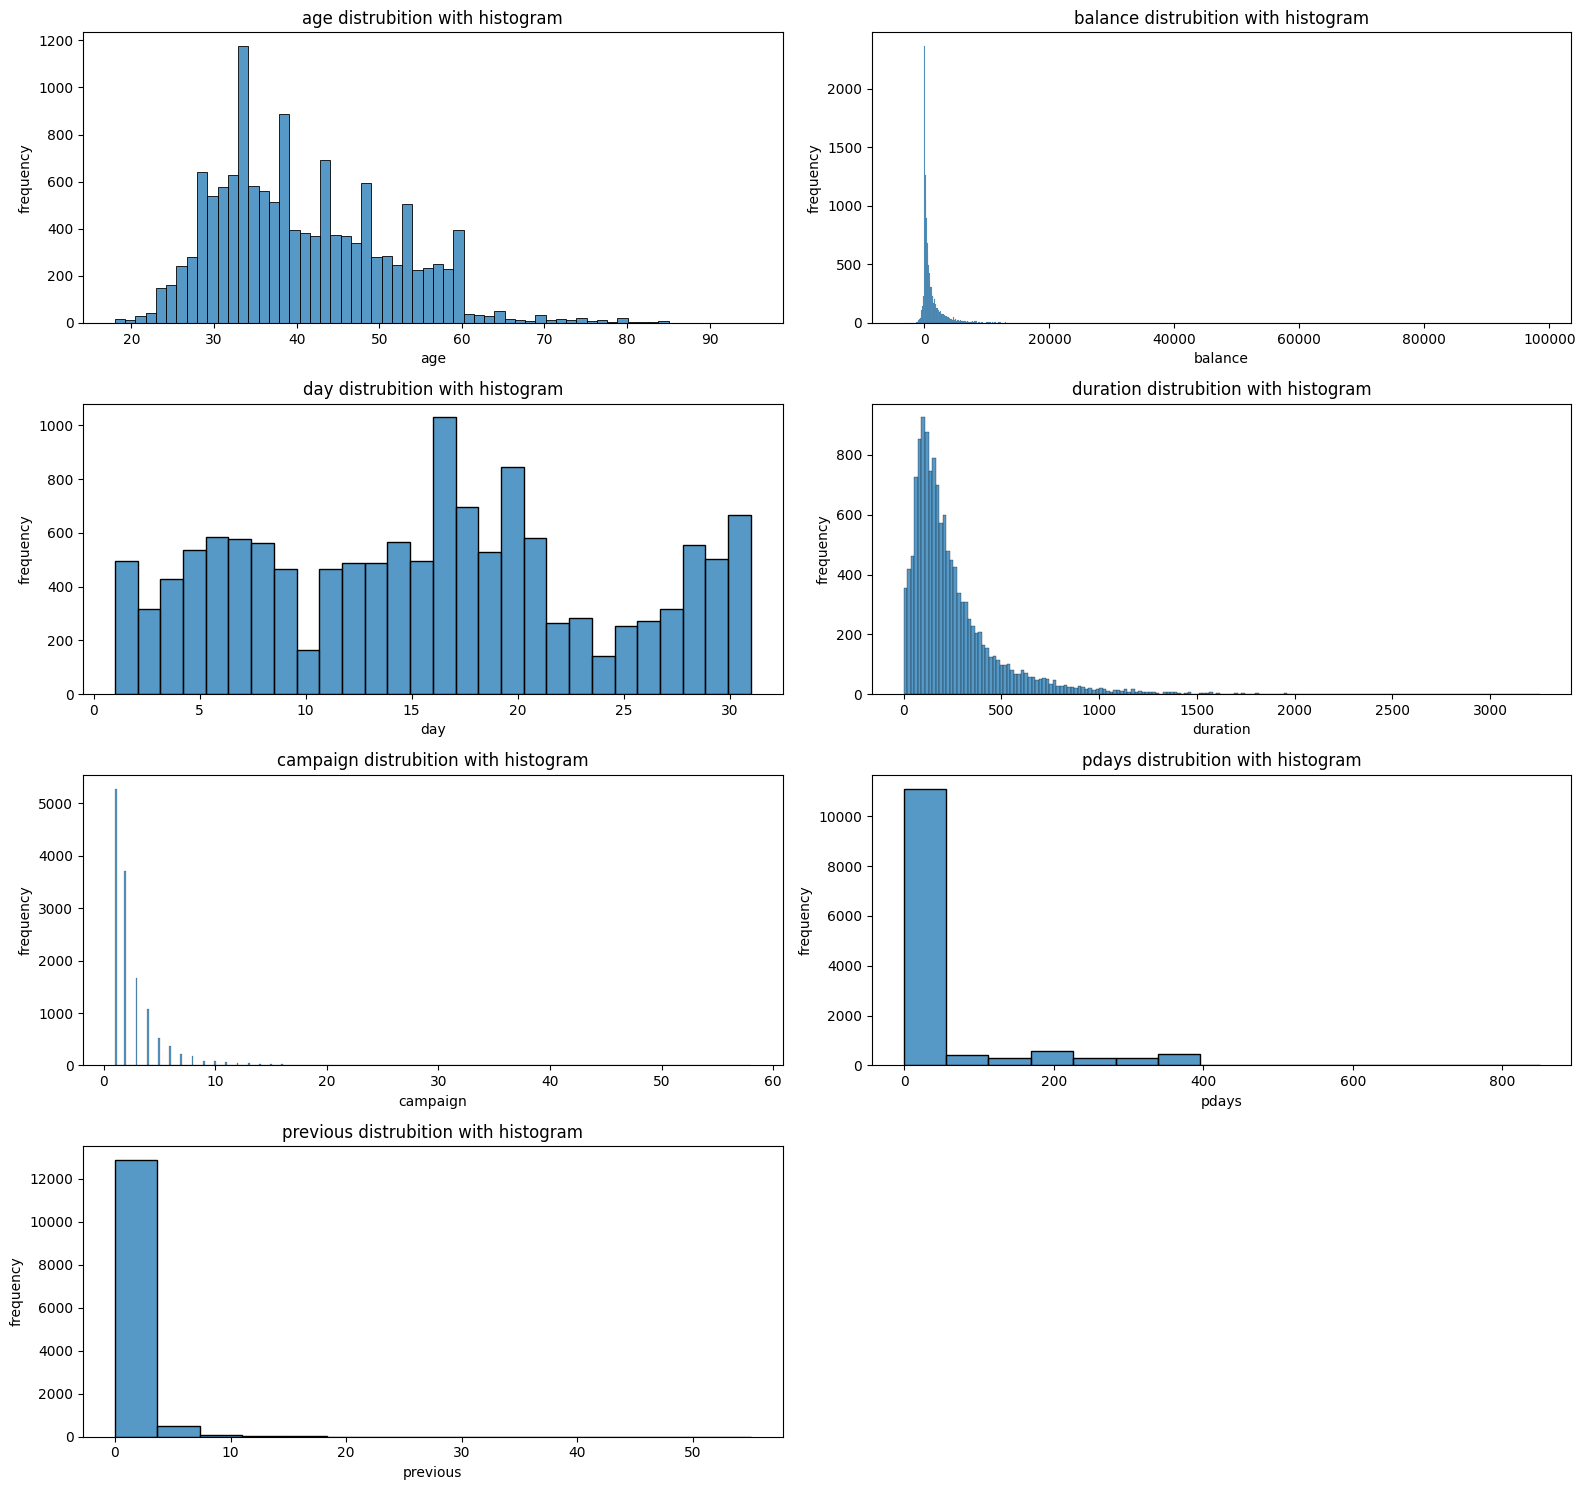

In [52]:
# Data Visualization
# Univariate Analysis on testing data

num = data_test.select_dtypes(include='number').columns # selecting the numerical columns from the testing dataset

# Remove the ID column from the num list
num = num[1:]

# Plotting histograms
plt.figure(figsize=(16,15))
for i, col in enumerate(num):
    plt.subplot(4,2, i+1)
    sns.histplot(data=data_test, x=data_test[col])
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.title("{} distrubition with histogram".format(col))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

We can daw the following conclusions from the testing data--
1. The value in the Age attribute ranges from 18 to 95 with majority of people falling in the range of 33-48(25%-75%).
2. The Balance attribute shows the balance of the client. It has a very wide range(-3313 to 98417). The minimum value is -3313 meaning people have negative balance. Majority of the people have balance ranging from 71 to 1431(25%-75%). This data is highly skewed because there is huge difference between the mean value(1358.5) and the 50 percentile value(445).
3. The day attribute represents the day of the the month the client was contacted. The range is 1-31. THe data is evenly distributed as indicated by the percentile values.
4. The duration attribute represents the duration of the contact. The minimum value is 0 and the maximum value is 3253 seconds. Majority of the contacts lasted from 102s to 319s.
5. The campaign attributed shows the number of times the client was contacted. The value ranges from 1 to 58 with majority of clients being contacted 1 to 3 times during the campaign.
6. The pdays represents the total number of days passed after the client was last contacted. Majority of clients have values -1 suggesting that they were not contacted. The maximum value is 850 suggesting some were contacted for a long time ago.
7. The previous variable represents the number of contacts made to clients before the current marketing campaign. Majority of clients have not been contacted before(value is 0).

In [53]:
for i in data_test.columns:
    if data_test[i].dtype=='object':
        print(i.upper()+"--")
        print(data_test[i].value_counts())
        print()

JOB--
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

MARITAL--
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

EDUCATION--
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64

DEFAULT--
no     13334
yes      230
Name: default, dtype: int64

HOUSING--
yes    7546
no     6018
Name: housing, dtype: int64

LOAN--
no     11451
yes     2113
Name: loan, dtype: int64

CONTACT--
cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64

MONTH--
may    4097
jul    2051
aug    1914
jun    1603
nov    1187
apr     877
feb     822
jan     426
oct     226
sep     169
mar     135
dec      57
Name: month, dtype: int64

POUTCOME--
unknown    11030
failure     1

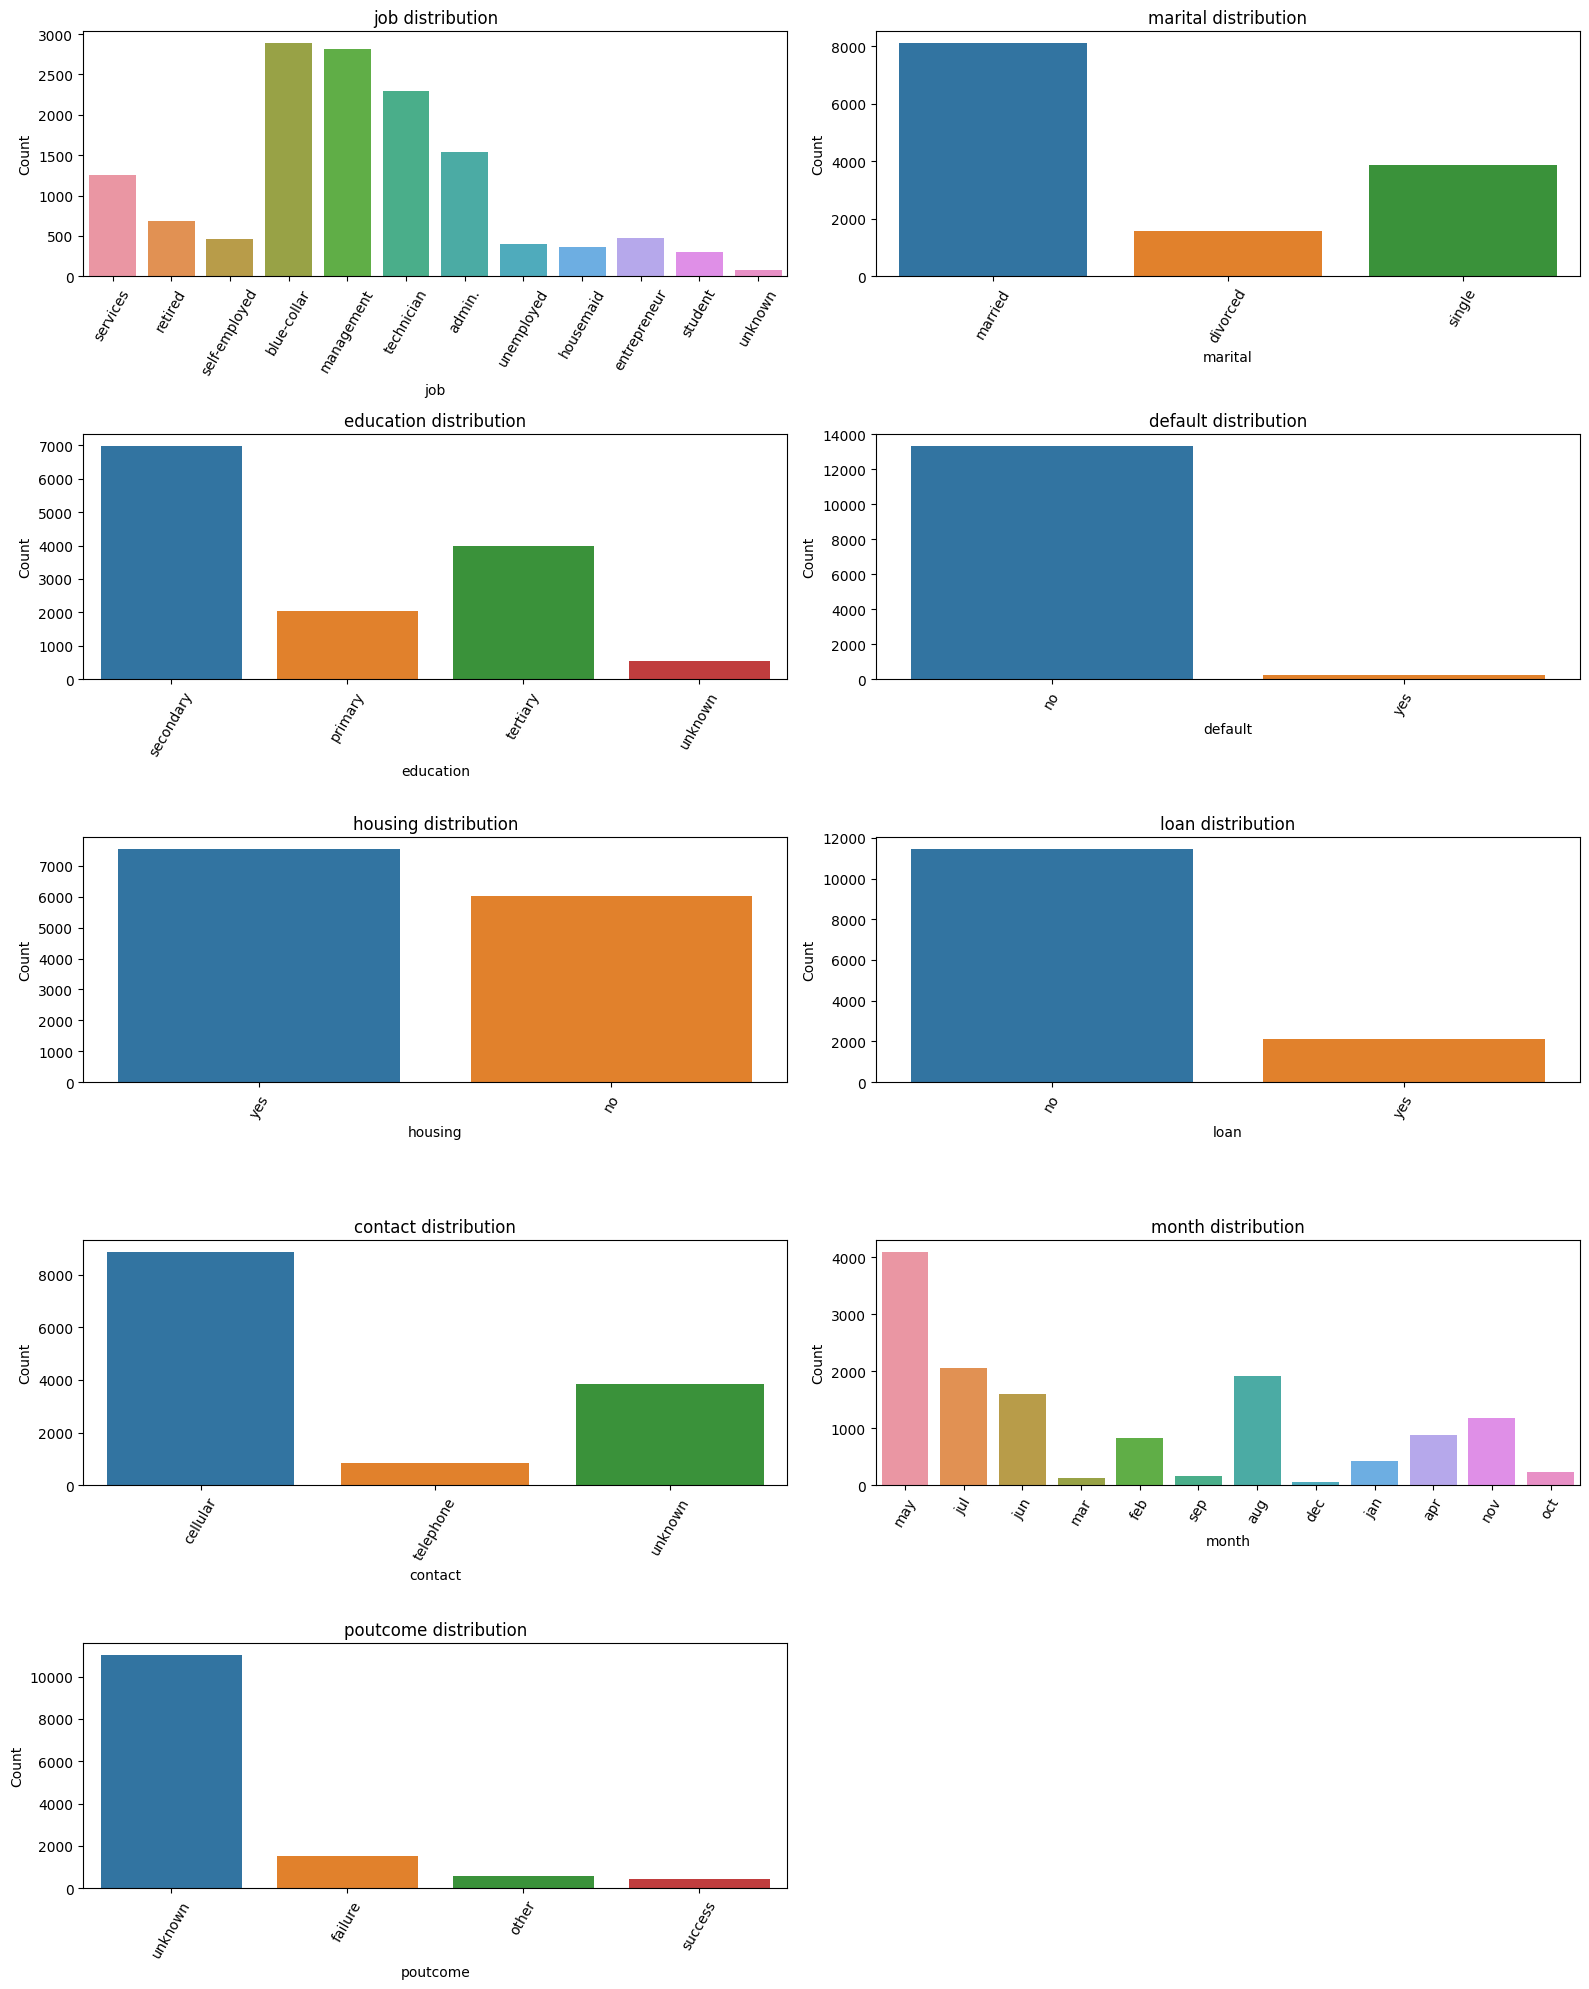

In [54]:
# data visualization
# selecting all the categorical columns
cat = data_test.select_dtypes(include='object').columns

# Plotting barplots
plt.figure(figsize=(16, 20))
for i, col in enumerate(cat):
    plt.subplot(5, 2, i+1)
    sns.countplot(data=data_test, x=data_test[col])
    plt.xticks(rotation=60)
    plt.ylabel("Count")
    plt.title("{} distribution".format(col))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

We can the following insights--
1. Majority of clients have blue-collar, management, and technician jobs. The categories "student" and "housemaid" have a relatively lower count. A small number of clients did not disclose the job details as indicated by 'unknown'.
2. The dataset has a higher number of married clients compared to single and divorced clients. This suggests married individuals are more likely to be customers of the bank.
3. Majority of clients have a secondary education level, followed by tertiary and primary levels. There is also a portion of clients with an unknown education level.
4. Majority of clients have no credit default. The count of clients with a credit default is significantly lower.
5. The number of clients with a housing loan is relatively higher compared to those without a housing loan.
6. Most clients do not have a personal loan, while a smaller proportion has taken a personal loan.
7. The most common type of communication used to contact the clients is cellular, followed by unknown(no contact information) and telephone.
8. May has the highest number of contacts, followed by July and August.
9. Majority of clients have an unknown outcome from a previous marketing campaign. The count of successful outcomes is the lowest.

#### Data Visualization

In [55]:
# lets find what percent of people subscribed to the campaign from the training data
percent = (data_train['subscribed'].value_counts()/data_train['subscribed'].value_counts().sum())*100
percent

no     88.261131
yes    11.738869
Name: subscribed, dtype: float64

88% of clients did not subscribed to the campaign. This shows that the data is highly imbalanced.

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
****************************************
marital     divorced  married  single
subscribed                           
no              3185    17176    7571
yes              445     1919    1351


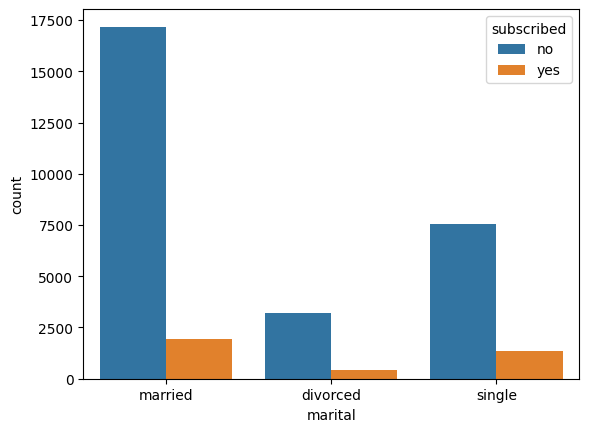

In [56]:
# plotting each attribute against the target variable
sns.countplot(data_train, x='marital', hue='subscribed')

print(data_train['marital'].value_counts())
print('*'*40)
subscribed = pd.crosstab(data_train['subscribed'], data_train['marital'])
print(subscribed)

Most of the clients in the dataset are married, and most of the subscribers are mostly married. The dataset contains least number of divorced clients and they are also least interested in the subscription.

yes    17584
no     14063
Name: housing, dtype: int64
********************
housing        no    yes
subscribed              
no          11698  16234
yes          2365   1350


<Axes: xlabel='housing', ylabel='count'>

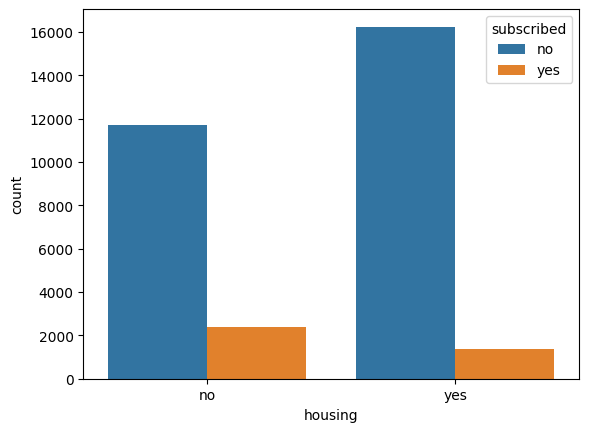

In [57]:
print(data_train['housing'].value_counts())
print('*'*20)
subscribed = pd.crosstab(data_train['subscribed'], data_train['housing'])
print(subscribed)

sns.countplot(data_train, x='housing', hue='subscribed')

Most of the clients have housing loans and they did not subscribe to term deposit.

no     26516
yes     5131
Name: loan, dtype: int64
********************
loan           no   yes
subscribed             
no          23132  4800
yes          3384   331


<Axes: xlabel='loan', ylabel='count'>

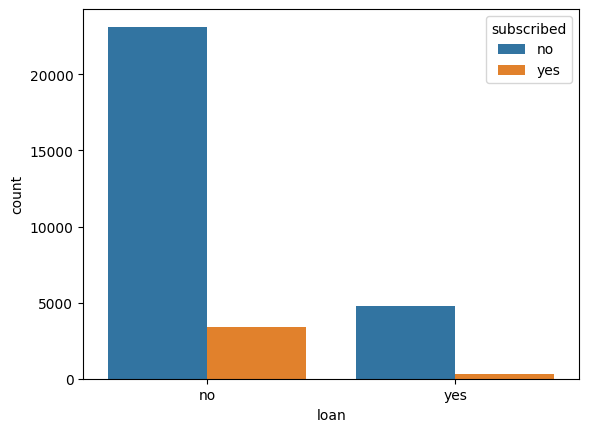

In [58]:
print(data_train['loan'].value_counts())
print('*'*20)
subscribed = pd.crosstab(data_train['subscribed'], data_train['loan'])
print(subscribed)

sns.countplot(data_train, x='loan', hue='subscribed')

It is observed that the majority of clients do not have personal loans and that clients without personal loans are more likely to subscribe to the campaign.

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
********************
education   primary  secondary  tertiary  unknown
subscribed                                       
no             4381      14527      7886     1138
yes             427       1697      1415      176


<Axes: xlabel='education', ylabel='count'>

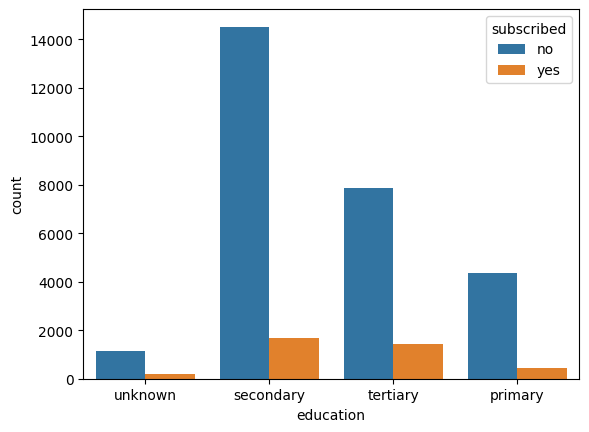

In [59]:
print(data_train['education'].value_counts())
print('*'*20)
subscribed = pd.crosstab(data_train['subscribed'], data_train['education'])
print(subscribed)

sns.countplot(data_train, x='education', hue='subscribed')

Majority of the clients have secondary and tertiary education and these clients are more likely to subscribe to the campaign since they might have a better understanding of the campaign and its profits and losses because of their education.

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
********************
job         admin.  blue-collar  entrepreneur  housemaid  management  retired  \
subscribed                                                                      
no            3179         6353           923        795        5716     1212   
yes            452          489            85         79         923      362   

job         self-employed  services  student  technician  unemployed  unknown  
subscribed                                                                     
no                    983      2649      453        4713         776      180  
yes                   140       254      182         594         129       26  


<Axes: xlabel='job', ylabel='count'>

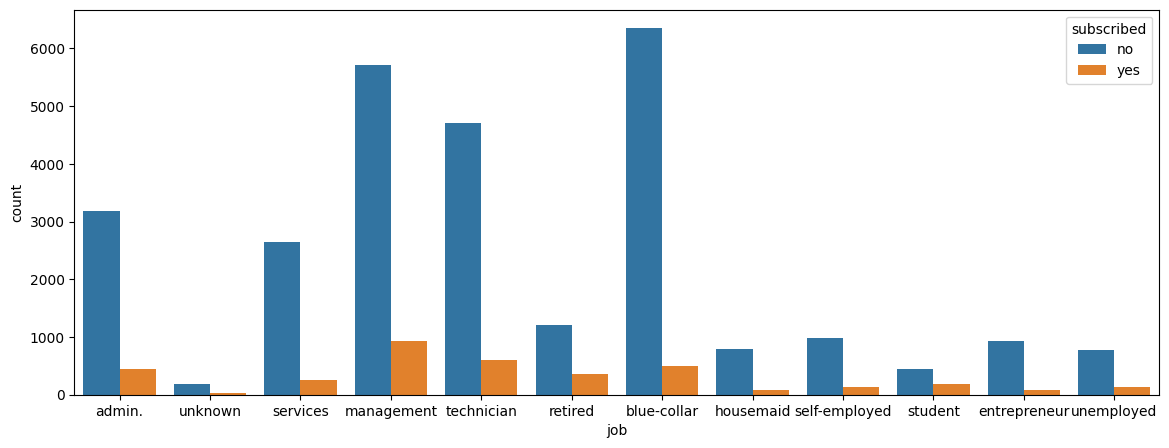

In [60]:
print(data_train['job'].value_counts())
print('*'*20)
subscribed = pd.crosstab(data_train['subscribed'], data_train['job'])
print(subscribed)

plt.figure(figsize=(14,5))
sns.countplot(data_train, x='job', hue='subscribed')

Majority of the clients who subscribed to the campaign belongs to either blue-collar jobs, management jobs, admin or technicians as they have high paying jobs and are more financially stable as compared to students and housemaids.

no     31062
yes      585
Name: default, dtype: int64
********************
default        no  yes
subscribed            
no          27388  544
yes          3674   41


<Axes: xlabel='default', ylabel='count'>

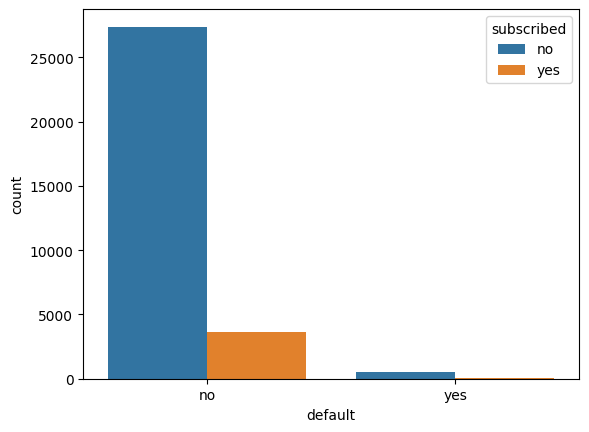

In [61]:
print(data_train['default'].value_counts())
print('*'*20)
subscribed = pd.crosstab(data_train['subscribed'], data_train['default'])
print(subscribed)

sns.countplot(data_train, x='default', hue='subscribed')

MOst of the clients are not defaulters and they are likey to subscribe to term deposit as compared to defaulters.

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64
********************
contact     cellular  telephone  unknown
subscribed                              
no             17352       1779     8801
yes             3071        268      376


<Axes: xlabel='contact', ylabel='count'>

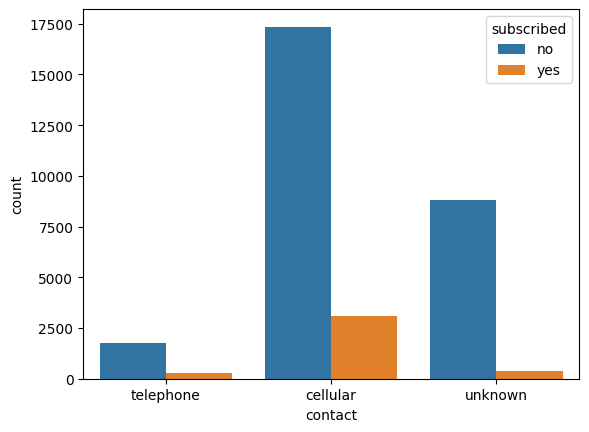

In [62]:
print(data_train['contact'].value_counts())
print('*'*20)
subscribed = pd.crosstab(data_train['subscribed'], data_train['contact'])
print(subscribed)

sns.countplot(data_train, x='contact', hue='subscribed')

Majority of the clients provided their cellular contact information. It is significant that most number of subscription comes from the people contacted via cellular informaion.

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64
********************
month        apr   aug  dec   feb  jan   jul   jun  mar   may   nov  oct  sep
subscribed                                                                   
no          1671  3813   85  1522  880  4403  3355  168  9020  2508  288  219
yes          384   520   72   305   97   441   383  174   649   275  224  191


<Axes: xlabel='month', ylabel='count'>

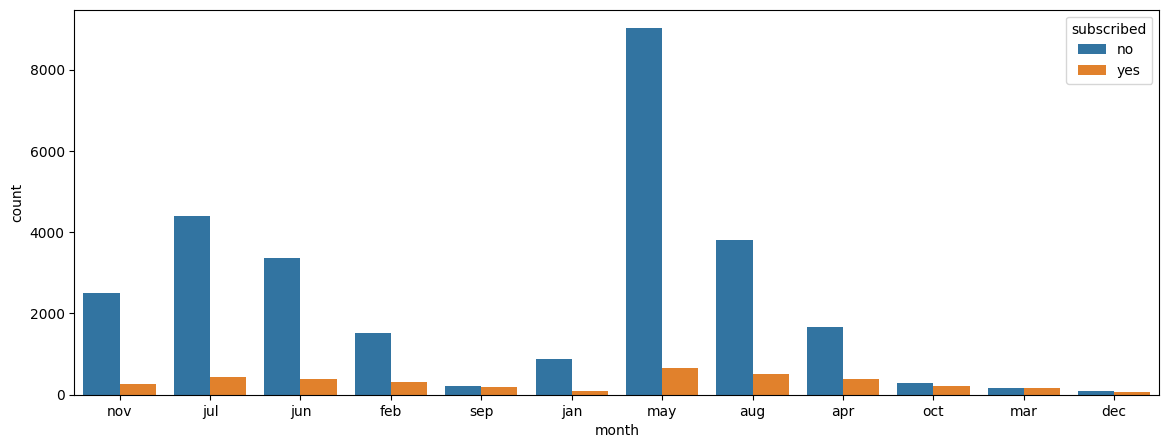

In [63]:
print(data_train['month'].value_counts())
print('*'*20)
subscribed = pd.crosstab(data_train['subscribed'], data_train['month'])
print(subscribed)

plt.figure(figsize=(14,5))
sns.countplot(data_train, x='month', hue='subscribed')

The month of May has the highest number of contacts. Among the contacts made in May, there were 384 subscriptions and 1,671 non-subscriptions.

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64
********************
poutcome    failure  other  success  unknown
subscribed                                  
no             2931   1071      374    23556
yes             431    217      694     2373


<Axes: xlabel='poutcome', ylabel='count'>

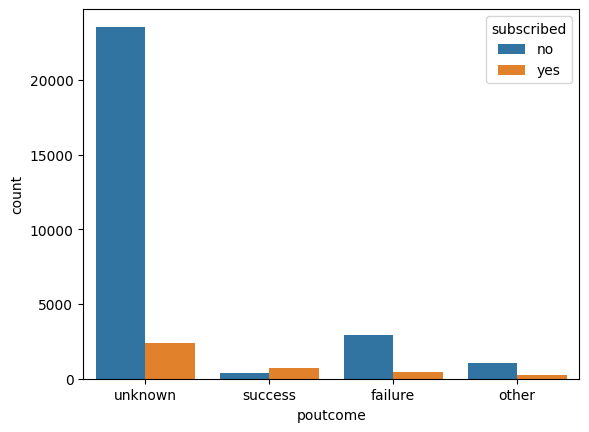

In [64]:
print(data_train['poutcome'].value_counts())
print('*'*20)
subscribed = pd.crosstab(data_train['subscribed'], data_train['poutcome'])
print(subscribed)

sns.countplot(data_train, x='poutcome', hue='subscribed')

This graph provide insights into the relationship between the outcome of the previous marketing campaign and the subscription outcome for the current campaign. It is apparent that clients who experienced a successful previous campaign or had an unknown outcome are more likely to subscribe to the current campaign.

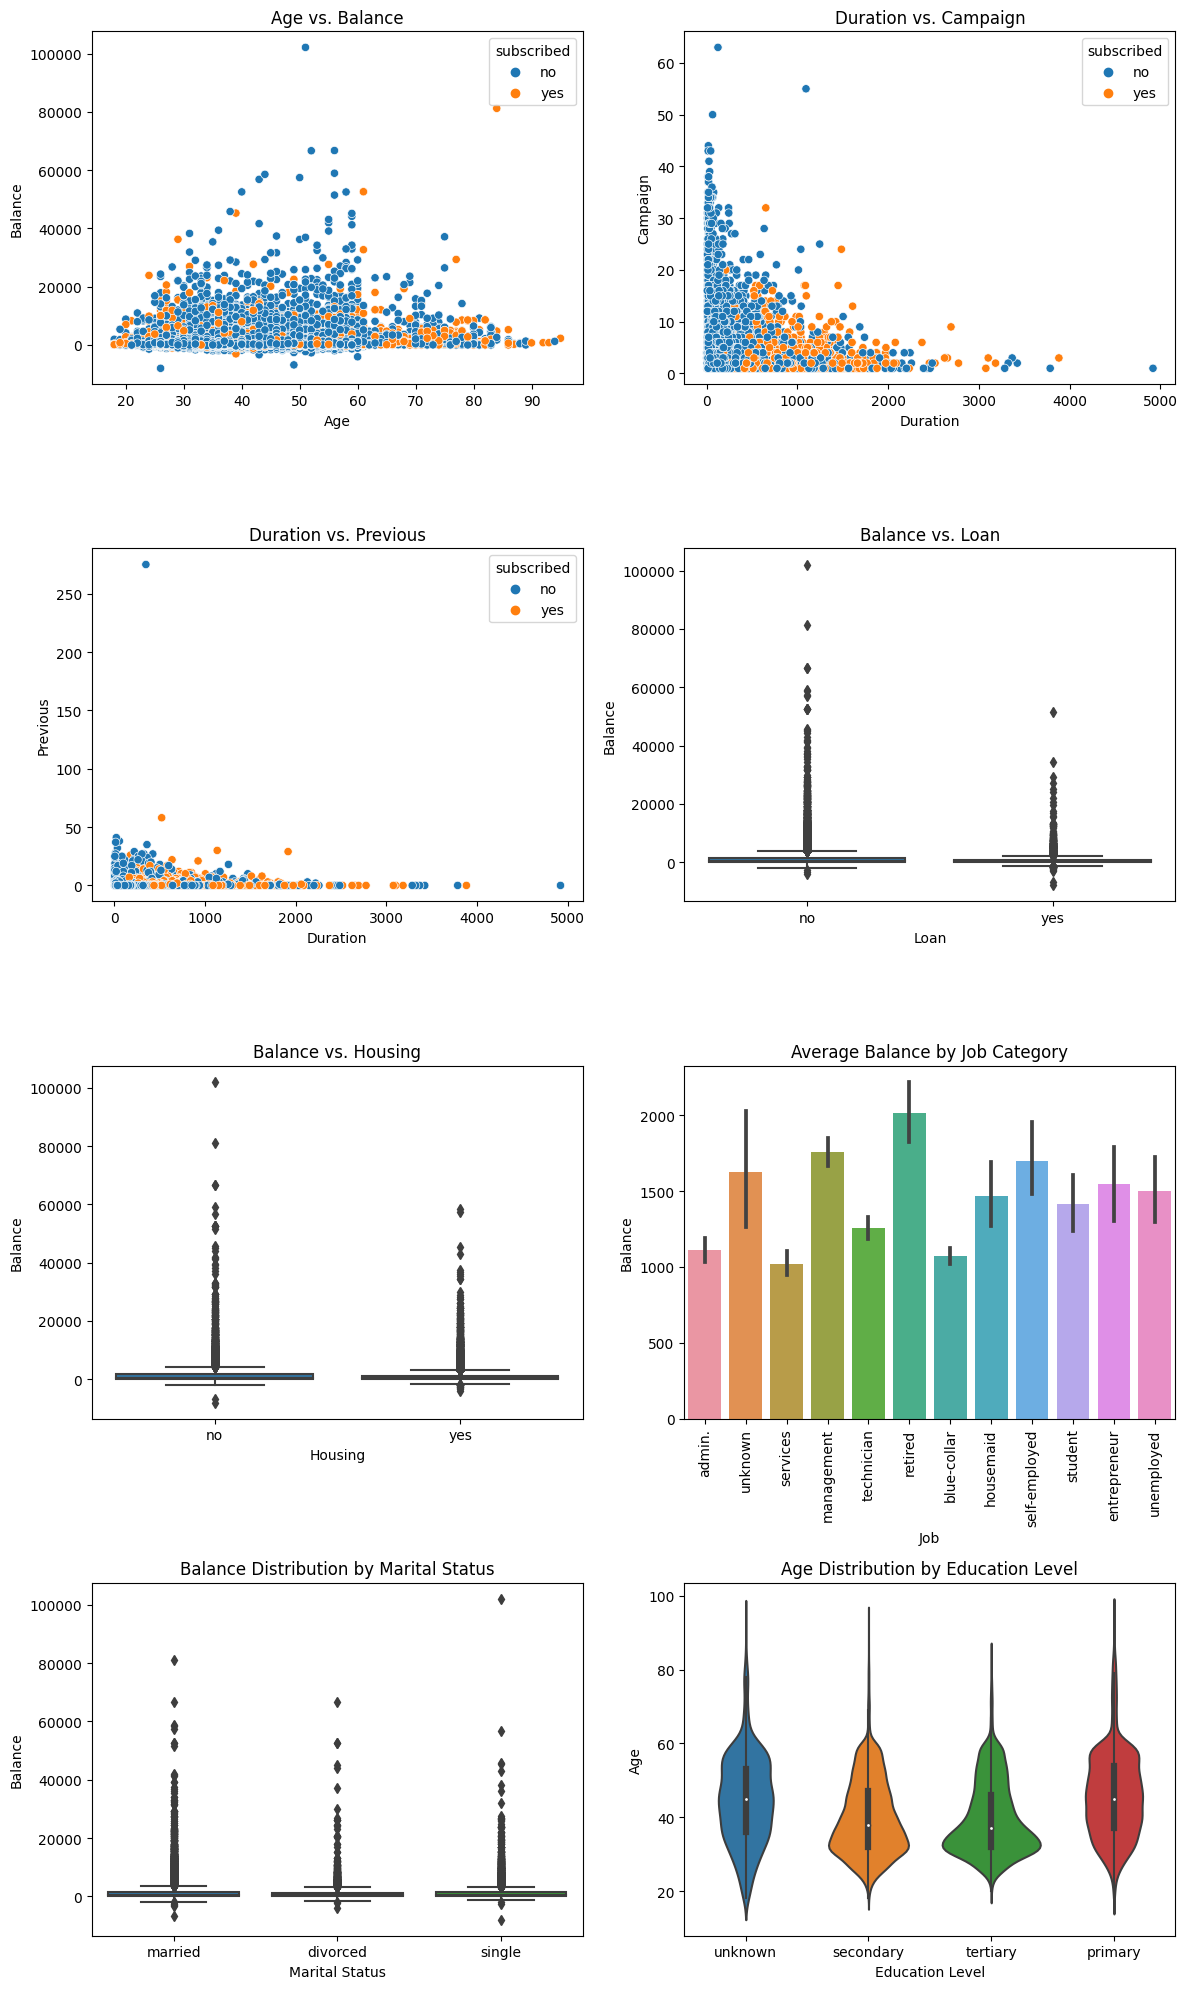

In [65]:
# plotting different attributes against ech other for furthur insights

# Plotting subplots

fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Plotting Age vs. Balance
sns.scatterplot(data=data_train, x='age', y='balance', hue='subscribed', ax=axes[0,0])
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Balance')
axes[0,0].set_title('Age vs. Balance')

# Plotting Duration vs. Campaign
sns.scatterplot(data=data_train, x='duration', y='campaign', hue='subscribed', ax=axes[0,1])
axes[0,1].set_xlabel('Duration')
axes[0,1].set_ylabel('Campaign')
axes[0,1].set_title('Duration vs. Campaign')

# Plotting Duration vs. Previous
sns.scatterplot(data=data_train, x='duration', y='previous', hue='subscribed', ax=axes[1,0])
axes[1,0].set_xlabel('Duration')
axes[1,0].set_ylabel('Previous')
axes[1,0].set_title('Duration vs. Previous')

# Plotting Balance vs. Loan
sns.boxplot(data=data_train, x='loan', y='balance', ax=axes[1,1])
axes[1,1].set_xlabel('Loan')
axes[1,1].set_ylabel('Balance')
axes[1,1].set_title('Balance vs. Loan')

# Plotting Balance vs. Housing
sns.boxplot(data=data_train, x='housing', y='balance', ax=axes[2,0])
axes[2,0].set_xlabel('Housing')
axes[2,0].set_ylabel('Balance')
axes[2,0].set_title('Balance vs. Housing')

# Plotting Job vs. Balance
sns.barplot(data=data_train, x='job', y='balance', ax = axes[2,1])
axes[2,1].set_xlabel('Job')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)
axes[2,1].set_ylabel('Balance')
axes[2,1].set_title('Average Balance by Job Category')

# Plotting Marital status vs. Balance
sns.boxplot(data=data_train, x='marital', y='balance', ax = axes[3,0])
axes[3,0].set_xlabel('Marital Status')
axes[3,0].set_ylabel('Balance')
axes[3,0].set_title('Balance Distribution by Marital Status')

# Plotting Age vs. Education
sns.violinplot(data=data_train, x='education', y='age', ax=axes[3,1])
axes[3,1].set_xlabel('Education Level')
axes[3,1].set_ylabel('Age')
axes[3,1].set_title('Age Distribution by Education Level')

plt.tight_layout()
plt.show()

**Age vs. Balance**: Plotting age against the balance reveal patterns in the distribution of account balances across different age groups. There are noticeable differences in saving or spending habits among diffeerent age groups. People in the 30-60 age group have the highest balance but theis age group has the lowest number of subscriber as well. Most of the accounts in this bank belong to this age group.

**Duration vs. Campaign**: Plotting the duration of contact (in seconds) against the number of contacts performed during the campaign provide insights into the effectiveness of the marketing campaign. We can see that most of the contacts performed were for smaller duration and as the duration increases, the number of contact decreases. This shows that contacts that continued for longer duration have higher success rate.

**Duration vs. Previous**: Plotting the duration of contact against the number of contacts performed before the current campaign shed light on the relationship between past interactions and the duration of contact. We can see that most of the clients that subscribed to the campaign have very little previous contact and this also shows that this current campaign is not influenced by the past interactions.

**Balance vs. Loan** and **Balance vs. Housing**: Plotting the account balance against the housing loan and personal loan status help identify any differences in balances between customers with and without personal and housing loans.  By examining both the plots we can say that, clients are fairly equally distributed across both the loan categories upto a specified range(here 40000). But, people with higher balance, having higher financial stability, prefer to have no loans.

**Balance vs. Job**: Plotting the account balance against the job category provide insights into the distribution of account balances based on the occupation or job category of the clients. We can see that retired clients have the highest average balance while the clients with blue-collar jobs have the lowest average balance even though the number of these clients were highest.

In [66]:
# using label encoder to convert categorical column to numerical in train data
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns in your dataset
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_columns:
    data_train[col] = label_encoder.fit_transform(data_train[col])

# Display the updated dataset
data_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


In [67]:
# test data

# Select the categorical columns in your dataset
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Apply label encoding to each categorical column
for col in cat_columns:
    data_test[col] = label_encoder.fit_transform(data_test[col])

# Display the updated dataset
data_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3


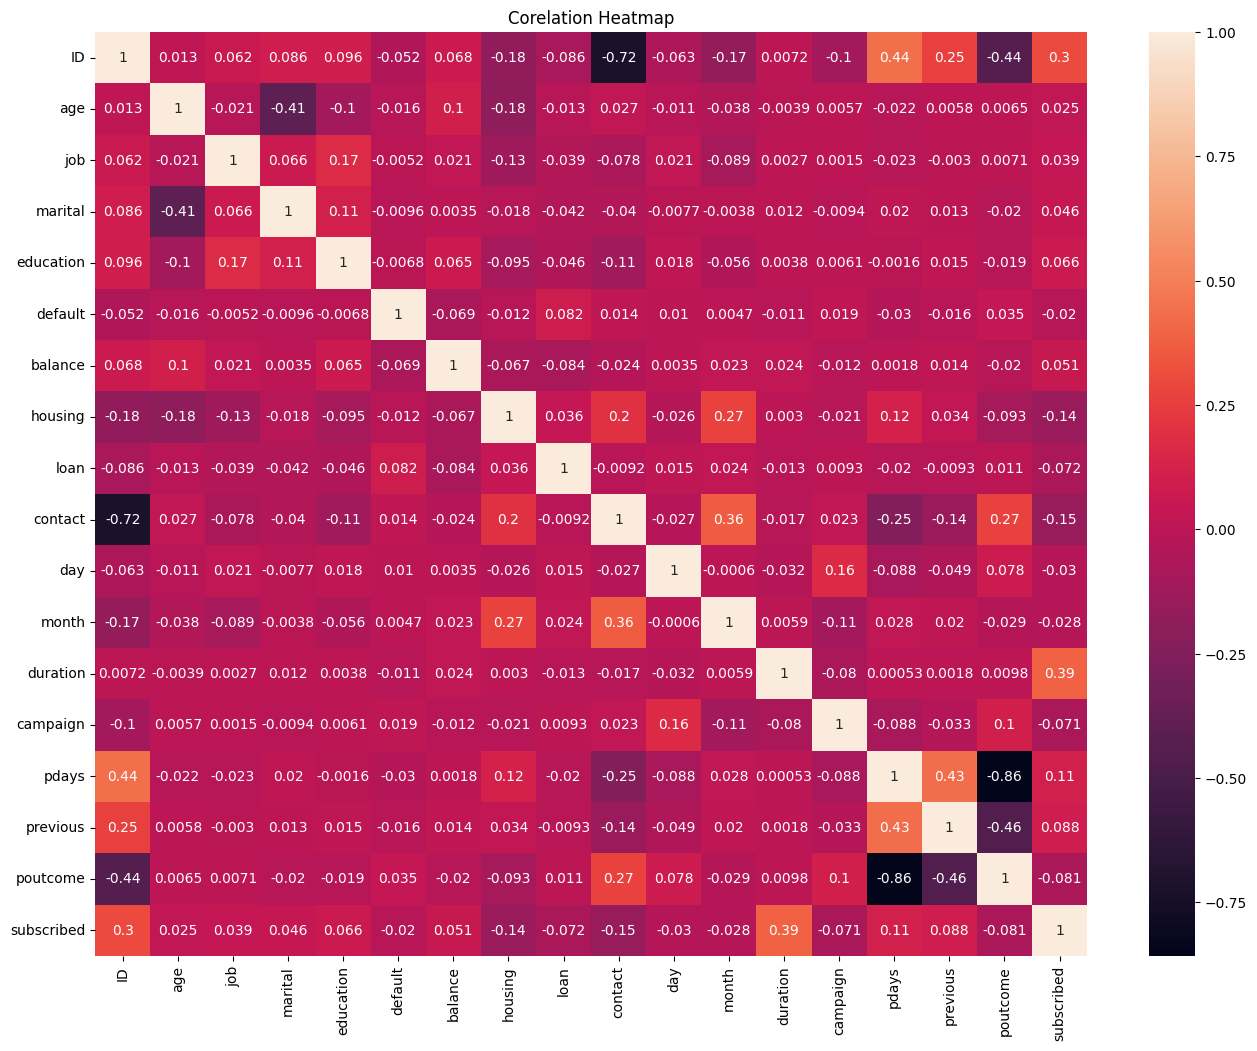

In [68]:
# heat map for both datasets
#train data
plt.figure(figsize=(16,12))
sns.heatmap(data_train.corr(), annot=True)
plt.title("Corelation Heatmap")
plt.show()

In [69]:
data_train.corr()['subscribed']

ID            0.296663
age           0.024538
job           0.038921
marital       0.046043
education     0.066051
default      -0.020168
balance       0.050807
housing      -0.141092
loan         -0.072266
contact      -0.150051
day          -0.029600
month        -0.028088
duration      0.389838
campaign     -0.070607
pdays         0.108290
previous      0.088081
poutcome     -0.080895
subscribed    1.000000
Name: subscribed, dtype: float64

1. 'duration' has a relatively strong positive correlation (0.389838) with the target variable 'subscribed'. This suggests that longer contact duration is associated with a higher likelihood of subscribing to the campaign.
2. 'pdays' and 'previous' also have positive correlations (0.108290 and 0.088081, respectively) with 'subscribed', although they are not as strong as 'duration'. This implies that having a longer time since the last contact or a higher number of previous contacts may slightly increase the likelihood of subscribing.
3. 'housing' and 'loan' have negative correlations (-0.141092 and -0.072266, respectively) with 'subscribed'. This indicates that clients with housing loans or personal loans are less likely to subscribe to the campaign.
4. Other features such as 'job', 'marital', 'education', and 'poutcome' have relatively lower correlations with 'subscribed', suggesting a weaker linear relationship.

In [70]:
# We will spit the training data into test and train and then use the best model on the testing data
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = data_train.drop(columns = ['subscribed'])
y = data_train['subscribed']

# scaling the dataset
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X_s,y, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (22152, 17)
X_test shape (9495, 17)
y_train shape (22152,)
y_test shape (9495,)


In [71]:
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100))]

scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

for name, model in models:
    print("Model: ", str(model))
    print("\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    # Calculate the scores
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Add scores to the DataFrame
    scores_df = scores_df.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}, ignore_index=True)

print(scores_df)


Model:  KNeighborsClassifier()


[[8101  284]
 [ 700  410]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8385
           1       0.59      0.37      0.45      1110

    accuracy                           0.90      9495
   macro avg       0.76      0.67      0.70      9495
weighted avg       0.88      0.90      0.89      9495

Model:  DecisionTreeClassifier()


[[7807  578]
 [ 520  590]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      8385
           1       0.51      0.53      0.52      1110

    accuracy                           0.88      9495
   macro avg       0.72      0.73      0.73      9495
weighted avg       0.89      0.88      0.89      9495

Model:  RandomForestClassifier()


[[8087  298]
 [ 541  569]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8385
           1       0.66      0.51      0.58      1110

In [72]:
# checking cv score for different classifiers
for name, model in models:
    cv_score = cross_val_score(model, X_s, y, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Difference between accuracy and cv score is: ", accuracy-cv_score.mean())
    print("\n")

Model : KNeighbors
cv_score : [0.89557662 0.89036335 0.89176805 0.89082003 0.89729815]
Mean Score 0.8931652412713413
Difference between accuracy and cv score is:  0.009204426975104152


Model : DecisionTree
cv_score : [0.88909953 0.8864139  0.88718597 0.88734397 0.88260389]
Mean Score 0.8865294513057949
Difference between accuracy and cv score is:  0.01584021694065063


Model : RandomForest
cv_score : [0.91200632 0.91121643 0.90867436 0.91436246 0.90835835]
Mean Score 0.9109235827856276
Difference between accuracy and cv score is:  -0.008553914539182084


Model : XGBoost
cv_score : [0.9121643  0.90995261 0.9108864  0.91294043 0.90867436]
Mean Score 0.9109236177309643
Difference between accuracy and cv score is:  -0.008553949484518819


Model : AdaBoost
cv_score : [0.90394945 0.9056872  0.90172223 0.91025438 0.90788434]
Mean Score 0.9058995216732226
Difference between accuracy and cv score is:  -0.003529853426777141




The XGBoost model has a high CV score of 0.9117 and a negative difference between accuracy and CV score (-0.0094). Although the difference is negative, it is relatively small, indicating a consistent performance between CV and test set. The XGBoost model shows good generalization and is less prone to overfitting. Thus it is the best model.

### Hyperparameter Tuning

In [73]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
grid = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [74]:
grid.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [75]:
# final model
final = XGBClassifier()
final.fit(X_train, y_train)
final_pred = final.predict(X_test)
print("Accuracy_final :", accuracy_score(y_test,final_pred)*100)

Accuracy_final : 91.61664033701949


In [76]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [77]:
# calculating predicted probabilities for the positive class
y_pred_probs = final.predict_proba(X_test)[:, 1]

Area : 0.9467582072233236


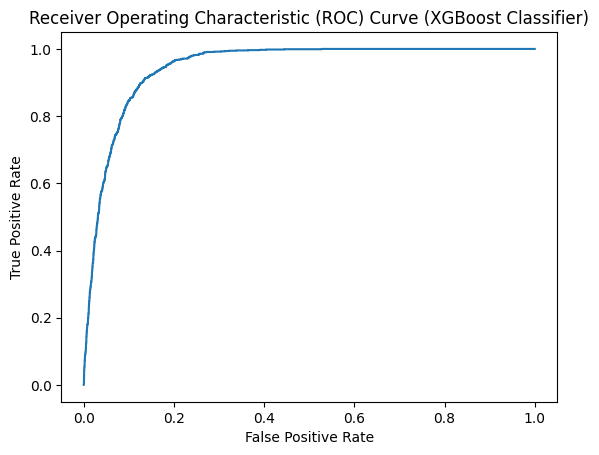

AUC_Score : 0.7672855324018114


In [78]:
#Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr,tpr)
print("Area :",roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost Classifier)')
plt.show()

# Calculate the AUC-ROC score using roc_auc_score
auc_score = roc_auc_score(y_test, final_pred)
print("AUC_Score :",auc_score)


In [79]:
# saving the model
import joblib
joblib.dump(final, "Bank_Clients_Analysis.pkl")

['Bank_Clients_Analysis.pkl']

In [81]:
# predicting on the test data with the saved model
#loading the aved model
model = joblib.load("Bank_Clients_Analysis.pkl")

# prediction
prediction = model.predict(data_test)
prediction

array([0, 0, 0, ..., 0, 1, 1])

These are the predicted values on the test data

In [84]:
predictions = prediction.tolist()
predictions[:10]

[0, 0, 0, 0, 1, 1, 0, 0, 0, 1]